## Fake News Detection Test

#### Import library

In [7]:
import pandas as pd
import numpy as np
import itertools
import matplotlib

In [8]:
df = pd.read_csv("news.csv")

In [9]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [10]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
df.shape

(6335, 4)

In [12]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [13]:
labels = df.label

In [14]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size = 0.2, random_state = 20)

In [17]:
x_train.head()

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
Name: text, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [19]:
# Initialize a IfidVectorizer
vector = TfidfVectorizer(stop_words='english',max_df=0.7)

In [20]:
# fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [21]:
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [22]:
# Predicting the test Dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)

In [23]:
score = accuracy_score(y_test, y_pred)

In [24]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 95.03%


In [25]:
# Confusion Matrics
confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

array([[623,  25],
       [ 38, 581]])

In [26]:
# Saving the model
import pickle
filename = "final_model.pkl"
pickle.dump(pac, open(filename, 'wb'))

In [ ]:
### Visualization 

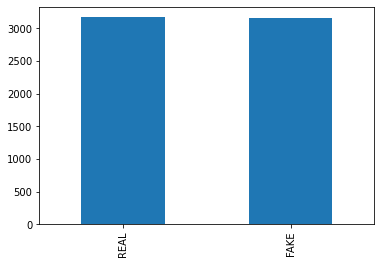

In [27]:
df['label'].value_counts().plot(kind="bar");

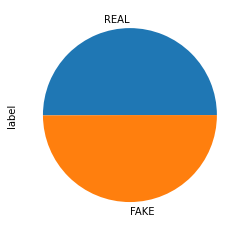

In [28]:
df['label'].value_counts().plot(kind="pie");

In [29]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [30]:
df.dropna(axis='columns')

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
